In [1]:
using ReachabilityAnalysis, Plots

In [2]:
X0 = BallInf(ones(2), 0.2)
prob = @ivp(x' = [0 1; -1 0.] * x, x(0) ∈ X0);

In [3]:
sol = solve(prob, T=6.0);

In [4]:
B = Ball2([0.0, -1.0], 0.5) # ball in the 2-norm
sol_touching = filter(R -> !isdisjoint(overapproximate(B, 1e-3), set(R)), array(sol));

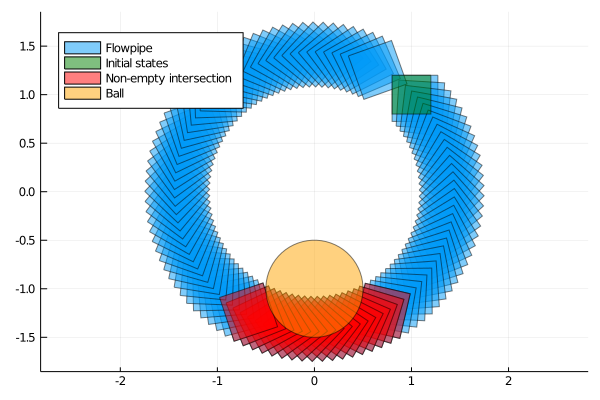

In [5]:
plot(sol, vars=(1, 2), ratio=1., lab="Flowpipe")
plot!(X0, color=:green, lab="Initial states")
plot!(sol_touching, vars=(1, 2), color=:red, alpha=.5, lab="Non-empty intersection")
plot!(B, color=:orange, lab="Ball", legend=:topleft)

In [6]:
# lower bound on the time entering the ball
tstart(sol_touching)

1.7999999999999972

In [7]:
# upper bound on the time leaving the ball
tend(sol_touching)

2.880000000000002

In [8]:
# interval enclosing the time spent intersecting the ball 
tspan(sol_touching)

[1.79999, 2.88001]

## Refinement

In [14]:
sol = solve(prob, T=6.0, alg=GLGM06(δ=1e-3));
sol_touching = filter(R -> !isdisjoint(overapproximate(B, 1e-3), set(R)), array(sol));

In [18]:
plot(sol, vars=(1, 2), ratio=1., lab="Flowpipe", lw=0.0)
plot!(X0, color=:green, lab="Initial states", lw=0.0)
plot!(sol_touching, vars=(1, 2), color=:red, alpha=.5, lw=0.0, lab="Non-empty intersection")
plot!(B, color=:orange, lab="Ball", legend=:topleft)

In [19]:
# lower bound on the time entering the ball
tstart(sol_touching)

1.8749999999998306

In [20]:
# upper bound on the time leaving the ball
tend(sol_touching)

2.8380000000003927

In [21]:
# interval enclosing the time spent intersecting the ball 
tspan(sol_touching)

[1.87499, 2.83801]